# Sleep_Efficiency

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

1. **ID**: 각 시험 과목에 대한 고유 식별자
2. **Age**: 피험자의 연령
3. **Gender**: 남성 또는 여성
4. **Bedtime**: 피험자가 매일 밤 잠자리에 드는 시간
5. **Wakeup time**: 피험자가 매일 아침 깨어나는 시간
6. **Sleep duration**: 피험자가 수면을 취한 총 시간
7. **Sleep efficiency**:  침대에서 보낸 시간 중 실제로 수면에 소요된 시간의 비율
8. **REM sleep percentage**: 렘수면에 소요된 총 수면 시간의 백분율
9. **Deep sleep percentage**: 깊은 숙면에 소요된 총 수면 시간의 백분율
10. **Light sleep percentage**: 가벼운 수면에 소요된 총 수면 시간의 백분율
11. **Awakenings**: 피험자가 밤에 깨어나는 횟수
12. **Caffeine consumption**: 취침 전 24시간 동안 섭취한 카페인의 양(mg)
13. **Alcohol consumption**: 취침 전 24시간 동안 섭취한 알코올의 양(온스)
14. **Smoking status**: 피험자의 흡연 여부
15. **Exercise frequency**: 피험자가 매주 운동하는 횟수

## 가설
1. 나이와 수면 효율이 관련이 있을 것이다.(관련x)
2. **Bedtime** 수면 효율이 관련이 있을 것이다.(관련o)
3. 수면 시간과 수면 효율이 관련이 있을 것이다.(관련x)
4. 카페인 섭취와 수면 효율이 관련이 있을 것이다.(관련x)
5. 알코올 섭취와 수면 효율이 관련이 있을 것이다.(관련o)
6. 흡연 여부와 수면 효율이 관련이 있을 것이다.(관련o)
7. 운동 빈도와 수면 효율이 관련이 있을 것이다.(관련o)

In [2]:
sleep = pd.read_csv('./Sleep_Efficiency.csv')

In [3]:
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
# 결측치 확인
sleep.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
# 결측치를 어떻게 처리해야 할까?

In [7]:
sleep['Awakenings'] = sleep['Awakenings'].fillna(0)
sleep['Caffeine consumption'] = sleep['Caffeine consumption'].fillna(0)
sleep['Alcohol consumption'] = sleep['Alcohol consumption'].fillna(0)
sleep['Exercise frequency'] = sleep['Exercise frequency'].fillna(0)

In [8]:
# sleep['Awakenings'].value_counts()
# sleep['Caffeine consumption'].value_counts()
# sleep['Alcohol consumption'].value_counts()
# sleep['Exercise frequency'].value_counts()

In [9]:
sleep.isna().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

# 가설1: 나이와 수면 효율이 관련이 있을 것이다.
=> 관련 없음

## 연령 별 수면 효율 파악하기

In [10]:
sleep['AgeGrp'] = sleep['Age'] // 10 * 10
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,AgeGrp
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,60
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,60
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,40
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,40
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,50


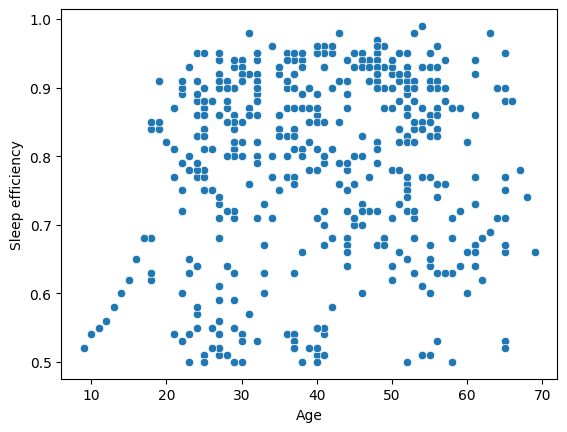

In [15]:
sns.scatterplot(x='Age', y='Sleep efficiency', data=sleep)
plt.show()

## 연령대 별 수면 효율 파악하기

In [11]:
AgeGroup = sleep.groupby(by=sleep['AgeGrp'], as_index=False)['Sleep efficiency'].mean()
AgeGroup

,AgeGrp,Sleep efficiency
0,0,0.520000
1,10,0.687500
2,20,0.766509
3,30,0.813474
4,40,0.807347
5,50,0.801569
6,60,0.754706


In [57]:
sleep['AgeGrp'].value_counts()

AgeGrp
20    106
50    102
40     98
30     95
60     34
10     16
0       1
Name: count, dtype: int64

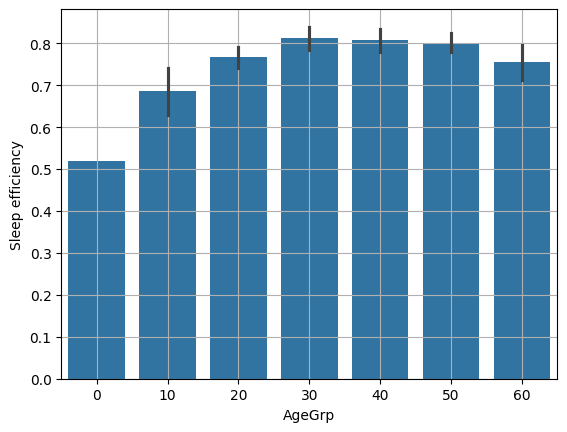

In [16]:
sns.barplot(x='AgeGrp', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [19]:
Age0 = sleep.loc[sleep['AgeGrp'] == 0, 'Sleep efficiency']
Age10 = sleep.loc[sleep['AgeGrp'] == 10, 'Sleep efficiency']
Age20 = sleep.loc[sleep['AgeGrp'] == 20, 'Sleep efficiency']
Age30 = sleep.loc[sleep['AgeGrp'] == 30, 'Sleep efficiency']
Age40 = sleep.loc[sleep['AgeGrp'] == 40, 'Sleep efficiency']
Age50 = sleep.loc[sleep['AgeGrp'] == 50, 'Sleep efficiency']
Age60 = sleep.loc[sleep['AgeGrp'] == 60, 'Sleep efficiency']

In [20]:
spst.f_oneway(Age0, Age10, Age20, Age30, Age40, Age50, Age60)

F_onewayResult(statistic=4.147185803801591, pvalue=0.0004559042878834474)

## 검정결과: 
**p-value가 0.05보다 낮으니, 연령대와 수면 효율은 관련있어 보이고 그래프를 보면 10세 미만, 10대, 60대일 경우 수면 효율이 떨어지는것으로 보이지만 표본이 적어 정확한 검증을 하기 어렵다.** 

---

# 가설2: Bedtime 수면 효율이 관련이 있을 것이다.
=> 관련 있음

In [32]:
## 취침시간과 분만 사용한 컬럼 생성
sleep['Bedtime'] = pd.to_datetime(sleep['Bedtime'])
sleep['BedHour'] = sleep['Bedtime'].dt.strftime('%H:%M')

In [33]:
sleep['BedHour']

0      01:00
1      02:00
2      21:30
3      02:30
4      01:00
       ...  
447    22:00
448    21:00
449    23:00
450    21:00
451    02:30
Name: BedHour, Length: 452, dtype: object

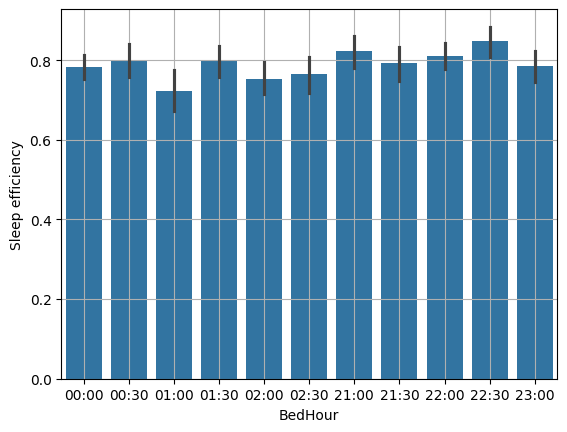

In [44]:
BedHour = sleep.sort_values(by='BedHour')
sns.barplot(x='BedHour', y='Sleep efficiency', data=BedHour)
plt.grid()
plt.show()

In [40]:
BedHour['BedHour'][0]

'01:00'

In [48]:
bt0000 = BedHour.loc[BedHour['BedHour'] == '00:00', 'Sleep efficiency']
bt0030 = BedHour.loc[BedHour['BedHour'] == '00:30', 'Sleep efficiency']
bt0100 = BedHour.loc[BedHour['BedHour'] == '01:00', 'Sleep efficiency']
bt0130 = BedHour.loc[BedHour['BedHour'] == '01:30', 'Sleep efficiency']
bt0200 = BedHour.loc[BedHour['BedHour'] == '02:00', 'Sleep efficiency']
bt0230 = BedHour.loc[BedHour['BedHour'] == '02:30', 'Sleep efficiency']
bt2100 = BedHour.loc[BedHour['BedHour'] == '21:00', 'Sleep efficiency']
bt2130 = BedHour.loc[BedHour['BedHour'] == '21:30', 'Sleep efficiency']
bt2200 = BedHour.loc[BedHour['BedHour'] == '22:00', 'Sleep efficiency']
bt2230 = BedHour.loc[BedHour['BedHour'] == '22:30', 'Sleep efficiency']
bt2300 = BedHour.loc[BedHour['BedHour'] == '23:00', 'Sleep efficiency']

In [47]:
spst.f_oneway(bt0000, bt0030, bt0100, bt0130, bt0200, bt0230, bt2100, bt2130, bt2200, bt2230, bt2300)

F_onewayResult(statistic=2.1558632296622466, pvalue=0.01949395702378499)

## 검정결과: 
**p-value의 값이 0.05보다 작기 때문에 취침시간과 수면효울은 관련이 있다고 확인되고, 늦은 시간인 1시, 2시, 2시 30분에 취침한 경우 수면 효율이 상대적으로 낮은것으로 보인다**

---

# 가설3: 수면 시간과 수면 효율이 관련이 있을 것이다.
=> 관련 없음

In [60]:
sleep['Sleep duration'].value_counts()

Sleep duration
7.0     154
8.0     103
7.5      88
6.0      34
8.5      28
9.0      26
10.0      8
5.0       8
5.5       3
Name: count, dtype: int64

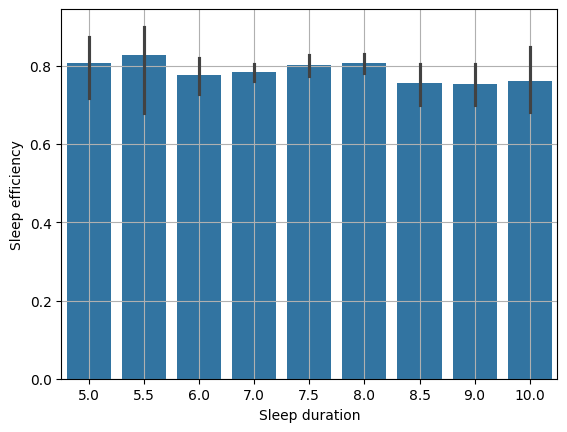

In [51]:
sns.barplot(x='Sleep duration', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [52]:
sd50 = sleep.loc[sleep['Sleep duration'] == 5.0, 'Sleep efficiency']
sd55 = sleep.loc[sleep['Sleep duration'] == 5.5, 'Sleep efficiency']
sd60 = sleep.loc[sleep['Sleep duration'] == 6.0, 'Sleep efficiency']
sd70 = sleep.loc[sleep['Sleep duration'] == 7.0, 'Sleep efficiency']
sd75 = sleep.loc[sleep['Sleep duration'] == 7.5, 'Sleep efficiency']
sd80 = sleep.loc[sleep['Sleep duration'] == 8.0, 'Sleep efficiency']
sd85 = sleep.loc[sleep['Sleep duration'] == 8.5, 'Sleep efficiency']
sd90 = sleep.loc[sleep['Sleep duration'] == 9.0, 'Sleep efficiency']
sd10 = sleep.loc[sleep['Sleep duration'] == 10.0, 'Sleep efficiency']

In [53]:
spst.f_oneway(sd50, sd55, sd60, sd70, sd75, sd80, sd85, sd90, sd10)

F_onewayResult(statistic=0.9485139687042193, pvalue=0.4760824016752916)

## 검정결과: 
**p-value의 값이 0.47로 0.05보다 크기때문에 수면 시간과 수면 효율은 관련이 없다고 판단되지만, 그래프를를 보았을때, 8시간 이상 수면시 수면 효율이 상대적으로 떨어지는것으로 보이지만 표본이 적어 정확한 판단을 할 수 없다.**

---

# 가설4: 카페인 섭취와 수면 효율이 관련이 있을 것이다.
=> 관련 없음

In [55]:
sleep['Caffeine consumption'].value_counts()

Caffeine consumption
0.0      236
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

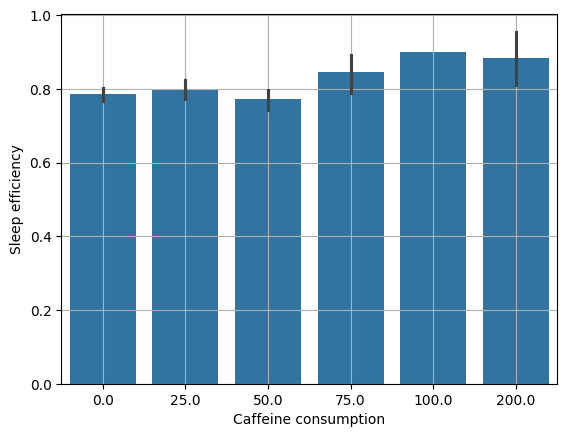

In [56]:
sns.barplot(x='Caffeine consumption', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [58]:
cf00 = sleep.loc[sleep['Caffeine consumption'] == 0.0, 'Sleep efficiency']
cf25 = sleep.loc[sleep['Caffeine consumption'] == 25.0, 'Sleep efficiency']
cf50 = sleep.loc[sleep['Caffeine consumption'] == 50.0, 'Sleep efficiency']
cf75 = sleep.loc[sleep['Caffeine consumption'] == 75.0, 'Sleep efficiency']
cf100 = sleep.loc[sleep['Caffeine consumption'] == 100.0, 'Sleep efficiency']
cf200 = sleep.loc[sleep['Caffeine consumption'] == 200.0, 'Sleep efficiency']

In [59]:
spst.f_oneway(cf00, cf25, cf50, cf75, cf100, cf200)

F_onewayResult(statistic=1.8898609943434348, pvalue=0.09476554015856875)

## 검정결과: 
**p-value의 값이 0.09로 0.05보다 크기때문에 카페인 섭취량과 수면 효율은 관련이 없다고 판단된다.**

---

# 가설5: 알코올 섭취와 수면 효율이 관련이 있을 것이다.
=> 관련 있음

In [62]:
sleep['Alcohol consumption'].value_counts()

Alcohol consumption
0.0    260
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: count, dtype: int64

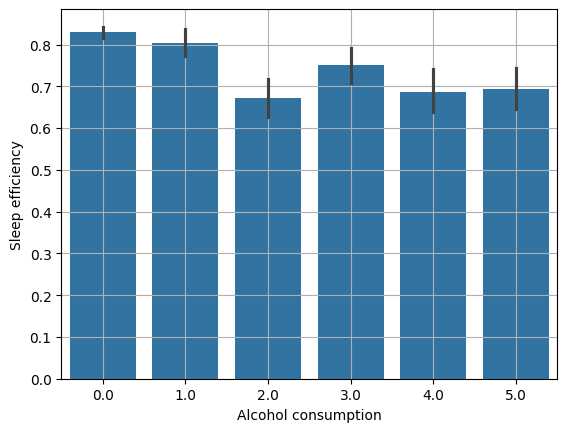

In [63]:
sns.barplot(x='Alcohol consumption', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [64]:
af00 = sleep.loc[sleep['Alcohol consumption'] == 0.0, 'Sleep efficiency']
af10 = sleep.loc[sleep['Alcohol consumption'] == 1.0, 'Sleep efficiency']
af20 = sleep.loc[sleep['Alcohol consumption'] == 2.0, 'Sleep efficiency']
af30 = sleep.loc[sleep['Alcohol consumption'] == 3.0, 'Sleep efficiency']
af40 = sleep.loc[sleep['Alcohol consumption'] == 4.0, 'Sleep efficiency']
af50 = sleep.loc[sleep['Alcohol consumption'] == 5.0, 'Sleep efficiency']

In [65]:
spst.f_oneway(af00, af10, af20, af30, af40, af50)

F_onewayResult(statistic=20.75743486342888, pvalue=1.1670730375075132e-18)

## 검정결과: 
**p-value의 값이 0.05보다 작기 때문에 알코올 섭취량과 수면 효율은 관련이 있고, 알코올 섭취가 없을때 수면 효율이 가장 높은것으로 판단된다.**

---

# 가설6: 흡연 여부와 수면 효율이 관련이 있을 것이다.
=> 관련 있음

In [66]:
sleep['Smoking status'].value_counts()

Smoking status
No     298
Yes    154
Name: count, dtype: int64

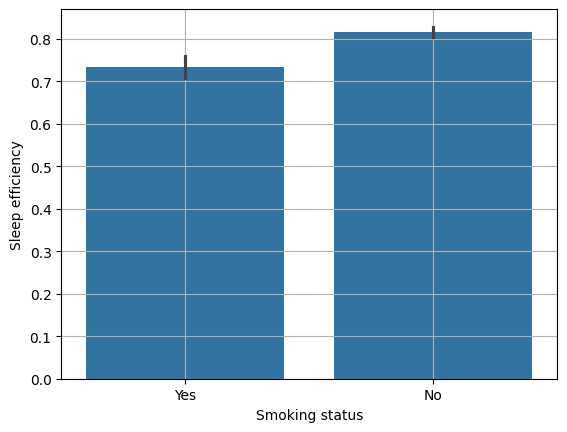

In [67]:
sns.barplot(x='Smoking status', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [68]:
smoking_yes = sleep.loc[sleep['Smoking status'] == 'Yes', 'Sleep efficiency']
smoking_no = sleep.loc[sleep['Smoking status'] == 'No', 'Sleep efficiency']

In [69]:
spst.ttest_ind(smoking_yes, smoking_no)

TtestResult(statistic=-6.4286893157053955, pvalue=3.2883105677757043e-10, df=450.0)

## 검정결과: 
**p-value의 값이 0.05보다 작기 때문에 흡연 여부와 수면 효율은 관련이 있고, 그래프 상으로도 비흡연자가 수면효율이 더 높아보인다.**

---

# 가설7: 운동 빈도와 수면 효율이 관련이 있을 것이다.
=> 관련 있음

In [70]:
sleep['Exercise frequency'].value_counts()

Exercise frequency
3.0    130
0.0    122
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

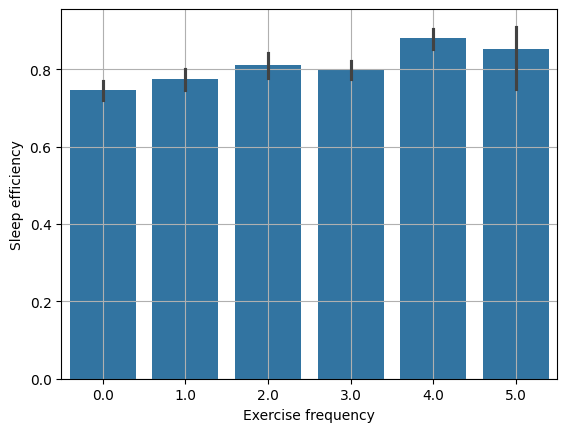

In [71]:
sns.barplot(x='Exercise frequency', y='Sleep efficiency', data=sleep)
plt.grid()
plt.show()

In [72]:
ef00 = sleep.loc[sleep['Exercise frequency'] == 0.0, 'Sleep efficiency']
ef10 = sleep.loc[sleep['Exercise frequency'] == 1.0, 'Sleep efficiency']
ef20 = sleep.loc[sleep['Exercise frequency'] == 2.0, 'Sleep efficiency']
ef30 = sleep.loc[sleep['Exercise frequency'] == 3.0, 'Sleep efficiency']
ef40 = sleep.loc[sleep['Exercise frequency'] == 4.0, 'Sleep efficiency']
ef50 = sleep.loc[sleep['Exercise frequency'] == 5.0, 'Sleep efficiency']

In [73]:
spst.f_oneway(ef00, ef10, ef20, ef30, ef40, ef50)

F_onewayResult(statistic=7.934438924144986, pvalue=3.548713700874235e-07)

## 검정결과: 
**p-value의 값이 0.05보다 작기 때문에 흡연 여부와 수면 효율은 관련 있고, 주에 운동 휫수가 4~5회일 경우 수면 효율이 높은것으로 판단된다.**

---

- 수면 효율과 관련있는 변수: 취침시간, 알코올 섭취, 흡연여부, 운동횟수
- 수면 효율과 관련없는 변수: 수면시간, 카페인 섭취
- 판단하기 어려운 변수: 연령

---

## 히트맵으로 상관관계 확인하기

In [78]:
# 데이터프레임에서 숫자형만 선택
numeric_sleep = sleep.select_dtypes(include=['number'])

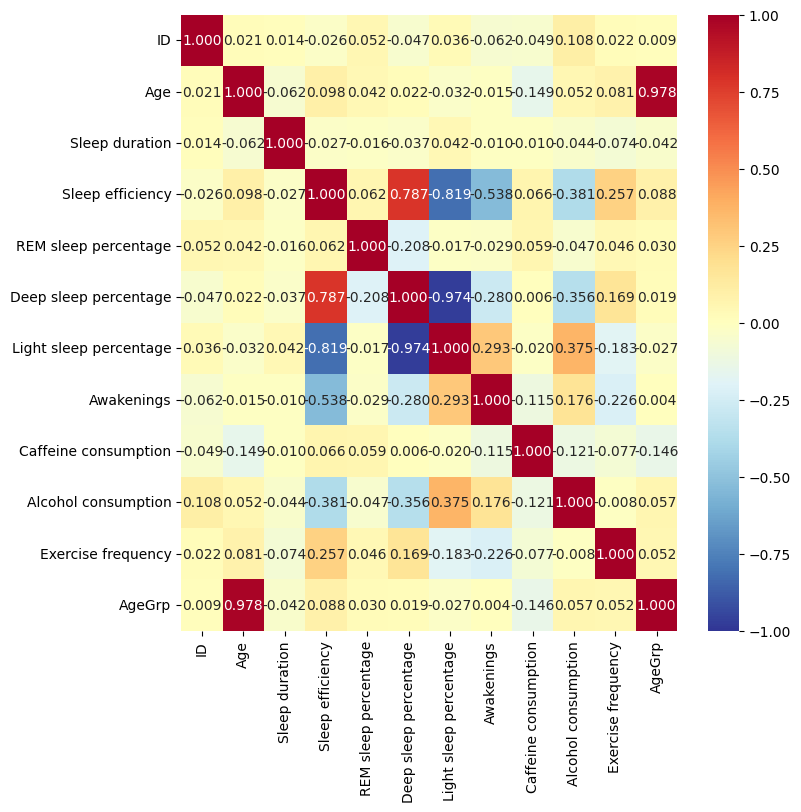

In [83]:
plt.figure(figsize = (8, 8))
sns.heatmap(numeric_sleep.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

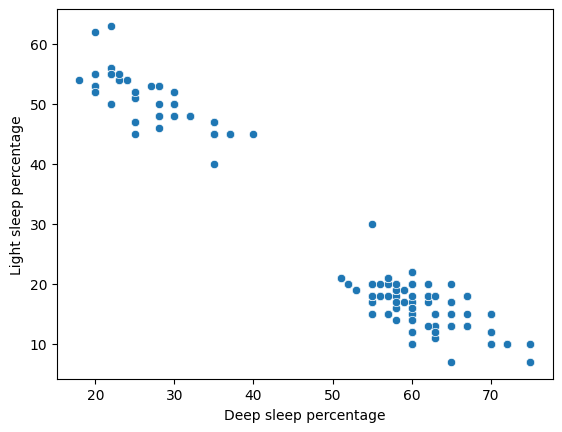

In [84]:
sns.scatterplot(x='Deep sleep percentage', y='Light sleep percentage', data=sleep)
plt.show()

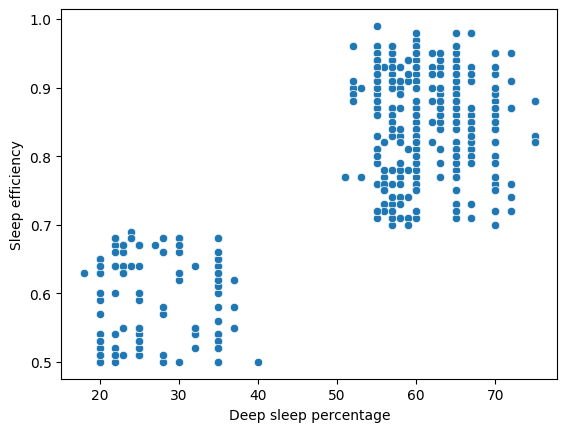

In [86]:
sns.scatterplot(x='Deep sleep percentage', y='Sleep efficiency', data=sleep)
plt.show()

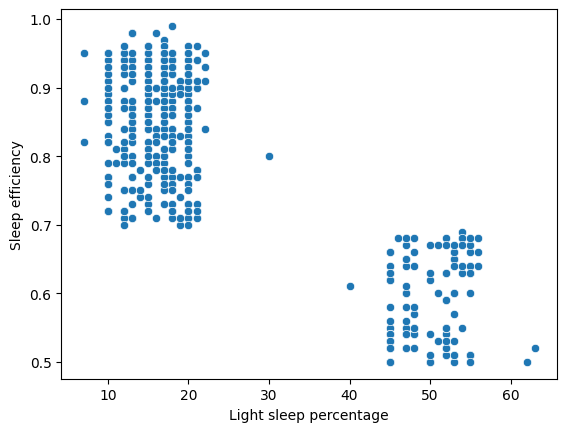

In [85]:
sns.scatterplot(x='Light sleep percentage', y='Sleep efficiency', data=sleep)
plt.show()

- 깊은 숙면에 소요된 수면 시간이 높을수록, 얕은 숙면에 소요된 수면 시간이 낮다.
- 깊은 숙면에 취하는 시간이 높을수록 숙면 효율이 높은것으로 보인다.